<a href="https://colab.research.google.com/github/heatherale/data_course/blob/main/Final_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project - analysis of data about electric vehicle (EV) charging sessions in Warsaw

Data source: [link](https://www.kaggle.com/datasets/alperenmyung/warsaw-ev-charging/data?select=charging_stations.csv)

Made by Kateryna Khudolii

October, 20th, 2025

The goal of this project was to analyse the historical data about electric vehicle charging sessions, that happened in different districts of Warsaw from August, 11th, 2025, to November, 11th, 2025 (Given the date range, I assume that the data set was generated).

During the completion of the project, several analytical questions were formulated and answered. The main goal was to define **what makes charging in certain districts and/or with certain EV charging operators more profitable than the others to give valuable insights to new and existing EV charging operators who want to install their EV charging stations in Warsaw**.

## Step 1 - Data import

As a first step, the data was imported from Google Drive and saved in the format of Pandas DataFrame.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data_path = '/content/drive/MyDrive/Warsaw_EV_charging.xlsx'

Mounted at /content/drive


In [2]:
dataset = pd.read_excel(data_path, sheet_name=None)
dataset.keys()

dict_keys(['charging_sessions', 'charging_stations', 'customers', 'districts'])

## Step 2 - Data quality check



In [3]:
def quality_check(df: pd.DataFrame, name: str):
  print("Quality report for " + name+" \n")
  print("Head: \n")
  display(df.head())
  print("\n Shape: \n")
  display(df.shape)
  print("\n Missing values: \n")
  display(df.isna().sum())
  print("\n Duplicates: \n")
  display(df.duplicated().value_counts())

In [4]:
quality_check(dataset['charging_sessions'], 'charging_sessions')
quality_check(dataset['charging_stations'], 'charging_stations')
quality_check(dataset['customers'], 'customers')
quality_check(dataset['districts'], 'districts')

Quality report for charging_sessions 

Head: 



,session_id,customer_id,station_id,session_start_time,kwh_charged,cost_per_kwh,total_cost
0,S00001,C3806,18,2025-10-04 05:42:00,46.691971,1.851397,86.445363
1,S00002,C4931,98,2025-10-19 16:12:00,39.061716,3.256199,127.192717
2,S00003,C2250,145,2025-09-14 15:18:00,30.280525,2.704520,81.894289
3,S00004,C3790,165,2025-10-06 23:22:00,44.577079,1.851397,82.529859
4,S00005,C4834,68,2025-09-26 09:07:00,37.998209,2.704520,102.766920



 Shape: 



(114000, 7)


 Missing values: 



,0
session_id,0
customer_id,0
station_id,0
session_start_time,0
kwh_charged,0
cost_per_kwh,0
total_cost,0



 Duplicates: 



,count
False,114000


Quality report for charging_stations 

Head: 



,station_id,district_name,income_tier,operator_name,plugs_count,latitude,longitude
0,1,Ursynów,Mid-Range,GreenWay,6,52.117487,20.998361
1,13,Włochy,Mid-Range,Orlen Charge,6,52.156694,20.984564
2,14,Wilanów,High,Tauron,6,52.128833,21.099949
3,18,Wesoła,Low-Mid,Ekoenergetyka,6,52.246600,21.250534
4,20,Ursynów,Mid-Range,Tauron,6,52.154188,21.049041



 Shape: 



(65, 7)


 Missing values: 



,0
station_id,0
district_name,0
income_tier,0
operator_name,0
plugs_count,0
latitude,0
longitude,0



 Duplicates: 



,count
False,65


Quality report for customers 

Head: 



,customer_id,income_tier,car_model,battery_capacity_kwh
0,C0001,High,Tesla Model 3,75.0
1,C0002,Mid-Range,MG ZS EV,69.9
2,C0003,Mid-Range,Hyundai Kona Electric,64.0
3,C0004,High,Ford Mustang Mach-E,91.0
4,C0005,High,BMW i4,83.9



 Shape: 



(8000, 4)


 Missing values: 



,0
customer_id,0
income_tier,0
car_model,0
battery_capacity_kwh,0



 Duplicates: 



,count
False,8000


Quality report for districts 

Head: 



,district_name,income_tier,projected_evs,projected_plugs,projected_regular_customers,population,category
0,Wilanów,High,3100,94,620,23960,outer
1,Śródmieście,High,2700,82,540,122646,inner
2,Żoliborz,High,1800,55,360,48342,inner
3,Mokotów,Mid-Range,3500,106,700,220682,inner
4,Wola,Mid-Range,3300,100,660,137519,inner



 Shape: 



(18, 7)


 Missing values: 



,0
district_name,0
income_tier,0
projected_evs,0
projected_plugs,0
projected_regular_customers,0
population,0
category,0



 Duplicates: 



,count
False,18


We have ensured that the data is well-structured, without any duplicates and missing values.
Now we can proceed with the further analysis of the data. The goal is to analyze EV charging patterns & user behaviour across different districts of the Warsaw city to understand the key trends and identify areas for improvement.

## Analytical question 1 - In general, where do most of the EV charging sessions happen in Warsaw, and what is this impacted by?

Let's calculate the total number of charging sessions per district.

In [5]:
#merging the required fields from the "charging stations" table to the "charging sessions" table

enriched_charging_sessions=dataset['charging_sessions'].merge(dataset['charging_stations'][['station_id','district_name','operator_name']],how='left',on='station_id')
enriched_charging_sessions

,session_id,customer_id,station_id,session_start_time,kwh_charged,cost_per_kwh,total_cost,district_name,operator_name
0,S00001,C3806,18,2025-10-04 05:42:00,46.691971,1.851397,86.445363,Wesoła,Ekoenergetyka
1,S00002,C4931,98,2025-10-19 16:12:00,39.061716,3.256199,127.192717,Wola,Orlen Charge
2,S00003,C2250,145,2025-09-14 15:18:00,30.280525,2.704520,81.894289,Ochota,Ekoenergetyka
3,S00004,C3790,165,2025-10-06 23:22:00,44.577079,1.851397,82.529859,Mokotów,Ekoenergetyka
4,S00005,C4834,68,2025-09-26 09:07:00,37.998209,2.704520,102.766920,Włochy,GreenWay
...,...,...,...,...,...,...,...,...,...
113995,S113996,C7127,70,2025-10-24 11:32:00,33.221606,2.704520,89.848502,Targówek,Tauron
113996,S113997,C1406,131,2025-09-04 00:41:00,55.850678,1.851397,103.401763,Ursynów,Orlen Charge
113997,S113998,C2269,14,2025-10-29 14:11:00,44.547895,2.704520,120.480680,Wilanów,Tauron
113998,S113999,C5246,155,2025-10-22 10:19:00,30.946160,2.704520,83.694513,Bemowo,Ekoenergetyka


In [6]:
avg_price_per_dist = enriched_charging_sessions.groupby(['district_name']).agg(avg_price_per_kwh=('cost_per_kwh','mean'))

income_per_dist = enriched_charging_sessions.groupby(['district_name']).agg(total_sessions=('session_id', 'count')).sort_values(by='total_sessions',ascending=False)
income_per_dist = income_per_dist.merge(dataset['districts'][['district_name','income_tier','population','category']],how='left',on='district_name')
income_per_dist = income_per_dist.merge(avg_price_per_dist,how='left',on='district_name')
income_per_dist['avg_price_per_kwh'] = round(income_per_dist['avg_price_per_kwh'],2)
income_per_dist

,district_name,total_sessions,income_tier,population,category,avg_price_per_kwh
0,Ursynów,20956,Mid-Range,145938,outer,2.56
1,Wesoła,19606,Low-Mid,22811,outer,2.56
2,Wilanów,13956,High,23960,outer,2.56
3,Włochy,10447,Mid-Range,38075,outer,2.57
4,Targówek,8746,Low-Mid,123278,outer,2.57
5,Ochota,8696,Mid-Range,84990,inner,2.56
6,Mokotów,8655,Mid-Range,220682,inner,2.57
7,Śródmieście,5259,High,122646,inner,2.56
8,Żoliborz,3595,High,48342,inner,2.55
9,Wola,3569,Mid-Range,137519,inner,2.55


Here we see that the majority of EV charging sessions happen in 3 districts - Ursynów, Wesoła and Wilanów. The overall charging activity in the districts does not depend on its income class - in some Low-Mid districts a lot more charging sessions happen than in some of the "High" ones. Surprisingly, the majority of the charging session does not happen in the most populated districts - most of them actually happen in the least populated areas at the outskirts of the city. That could mean that:

*   Most of the charging sessions are initiated by long-range drivers: either the ones who are leaving the city and charging ahead of the long trip, or the ones arriving from other cities. The fast charging stations which are usually used during long-term trips are usually located near the highways, at the outskirts of the city.
*   Most of the charging sessions are initiated by fleet drivers whose car parks are usually located at the outskirts of the city.
*   The activity in the districts depend on the # of charging stations located there and/or the presence of certain operators (this hypothesis will be checked later.)

Unfortunately the present dataset does not include the data about station types or the precision of points of interest to prove or dismiss the first 2 takes.

We can also see that the average cost of kWh is nearly equal in all the districts, which means that the pricing strategy does not have an impact on the usage as well.

Now, let's try and analyze districts' performance in terms of active users and see if it correlates with the total number of sessions.

In [7]:
active_users_per_district = enriched_charging_sessions.groupby(['district_name','customer_id']).agg(unique_sessions=('session_id','nunique')).reset_index()
active_users_per_district = active_users_per_district[active_users_per_district['unique_sessions']>=2]
active_users_per_district = active_users_per_district.groupby(['district_name']).agg(active_users=('customer_id','count'))
income_per_dist = income_per_dist.merge(active_users_per_district,how='left',on='district_name')
income_per_dist

,district_name,total_sessions,income_tier,population,category,avg_price_per_kwh,active_users
0,Ursynów,20956,Mid-Range,145938,outer,2.56,5872
1,Wesoła,19606,Low-Mid,22811,outer,2.56,5583
2,Wilanów,13956,High,23960,outer,2.56,4206
3,Włochy,10447,Mid-Range,38075,outer,2.57,2989
4,Targówek,8746,Low-Mid,123278,outer,2.57,2416
5,Ochota,8696,Mid-Range,84990,inner,2.56,2337
6,Mokotów,8655,Mid-Range,220682,inner,2.57,2330
7,Śródmieście,5259,High,122646,inner,2.56,1107
8,Żoliborz,3595,High,48342,inner,2.55,618
9,Wola,3569,Mid-Range,137519,inner,2.55,586


We see a clear correlation here - districts with the most charging sessions have the highest number of active users. However, we're yet to define what causes such a success for the leading districts.

Let us consider the same values for both the districts and operators.

In [8]:
sess_per_op = pd.pivot_table(enriched_charging_sessions,values='session_id',index='operator_name',aggfunc='count')
sess_per_op = sess_per_op.sort_values(by='session_id',ascending=False)
display(sess_per_op.style.format("{:.0f}"))

,session_id
operator_name,
Ekoenergetyka,26558
GreenWay,26475
Tesla,26178
Orlen Charge,20554
Tauron,14235


We see that there are three clear leaders in terms of operators - Ekoenergetyka, GreenWay and Tesla. Let's see if the success of certain district depends on the presence of certain operators there.

In [9]:
op_presence = pd.pivot_table(dataset['charging_stations'],values='station_id',index='district_name',columns='operator_name',aggfunc='count')
op_presence['total'] = op_presence.sum(axis=1,numeric_only=True)
op_presence = op_presence.sort_values(by='total',ascending=False)

cols_subset = [c for c in op_presence.columns if c!='total']

op_shares = op_presence[cols_subset].div(op_presence['total'],axis=0).fillna(0)
op_shares = (op_shares[cols_subset]*100).round(2)
op_shares['total_stations'] = op_presence['total']
op_shares.sort_values(by='total_stations',ascending=False)

op_shares

operator_name,Ekoenergetyka,GreenWay,Orlen Charge,Tauron,Tesla,total_stations
district_name,,,,,,
Ursynów,25.00,8.33,25.00,16.67,25.00,12.0
Wesoła,27.27,27.27,0.00,9.09,36.36,11.0
Wilanów,12.50,25.00,12.50,25.00,25.00,8.0
Włochy,33.33,16.67,33.33,0.00,16.67,6.0
Mokotów,40.00,0.00,20.00,20.00,20.00,5.0
Ochota,20.00,40.00,20.00,0.00,20.00,5.0
Targówek,0.00,40.00,20.00,20.00,20.00,5.0
Śródmieście,0.00,66.67,0.00,33.33,0.00,3.0
Bemowo,50.00,0.00,0.00,0.00,50.00,2.0


Obviously, the districts with the largest number of charging stations 	- Ursynów, Wesoła, Wilanów, and Włochy also get the highest number of total sessions. However, there is an interesting pattern: **only the districts which have the highest "diversity" of operators, have attracted the highest # of active users and the largest # of sessions**.

That leads us to our next analytical question:

## Analytical question 2 - What was the average utilization (the number of charging sessions per station) of the charging station in each district during the given period? What was this impacted by?

In [10]:
stat_per_dist = dataset['charging_stations'].groupby('district_name').agg(total_stations=('station_id','count')).reset_index()
stat_per_dist
util_per_dist = income_per_dist.merge(stat_per_dist[['district_name','total_stations']],how='left',on='district_name')
util_per_dist['ses_per_stat'] = util_per_dist['total_sessions']/util_per_dist['total_stations']
util_per_dist = util_per_dist.sort_values(by='ses_per_stat',ascending=False)
util_per_dist['ses_per_stat'] = util_per_dist['ses_per_stat'].round(1)

util_per_dist

,district_name,total_sessions,income_tier,population,category,avg_price_per_kwh,active_users,total_stations,ses_per_stat
8,Żoliborz,3595,High,48342,inner,2.55,618,2,1797.5
9,Wola,3569,Mid-Range,137519,inner,2.55,586,2,1784.5
10,Rembertów,3565,Low-Mid,23280,outer,2.56,612,2,1782.5
1,Wesoła,19606,Low-Mid,22811,outer,2.56,5583,11,1782.4
11,Bemowo,3530,Low-Mid,115873,outer,2.55,614,2,1765.0
7,Śródmieście,5259,High,122646,inner,2.56,1107,3,1753.0
4,Targówek,8746,Low-Mid,123278,outer,2.57,2416,5,1749.2
0,Ursynów,20956,Mid-Range,145938,outer,2.56,5872,12,1746.3
2,Wilanów,13956,High,23960,outer,2.56,4206,8,1744.5
3,Włochy,10447,Mid-Range,38075,outer,2.57,2989,6,1741.2


We see that, in fact, utilization is almost the same across all districts, being even higher in districts with fewer stations and scarcity of operators. Therefore, EV charging is in high demand in all districts of Warsaw.

**When installing new stations, operators can pay attention to highly populated areas with high utlization of existing stations and few stations installed (e.g. Wola).**

Now, let's analyze the utilization not just in general, but on a daily basis.

##Analytical question 3 - What is the average daily utilization of a station in each district? What is this impacted by?

In [11]:
dataset['charging_sessions']['session_start_time'] = pd.to_datetime(dataset['charging_sessions']['session_start_time'])
min_date = dataset['charging_sessions']['session_start_time'].min()
max_date = dataset['charging_sessions']['session_start_time'].max()
time_period = (max_date-min_date).days
time_period

89

In [12]:
util_per_dist['sess_per_stat_per_day'] = util_per_dist['total_sessions']/util_per_dist['total_stations']/time_period
util_per_dist = util_per_dist.sort_values(by='sess_per_stat_per_day',ascending=False)
util_per_dist['sess_per_stat_per_day'] = util_per_dist['sess_per_stat_per_day'].round(1)
util_per_dist

,district_name,total_sessions,income_tier,population,category,avg_price_per_kwh,active_users,total_stations,ses_per_stat,sess_per_stat_per_day
8,Żoliborz,3595,High,48342,inner,2.55,618,2,1797.5,20.2
9,Wola,3569,Mid-Range,137519,inner,2.55,586,2,1784.5,20.1
10,Rembertów,3565,Low-Mid,23280,outer,2.56,612,2,1782.5,20.0
1,Wesoła,19606,Low-Mid,22811,outer,2.56,5583,11,1782.4,20.0
11,Bemowo,3530,Low-Mid,115873,outer,2.55,614,2,1765.0,19.8
7,Śródmieście,5259,High,122646,inner,2.56,1107,3,1753.0,19.7
4,Targówek,8746,Low-Mid,123278,outer,2.57,2416,5,1749.2,19.7
0,Ursynów,20956,Mid-Range,145938,outer,2.56,5872,12,1746.3,19.6
2,Wilanów,13956,High,23960,outer,2.56,4206,8,1744.5,19.6
3,Włochy,10447,Mid-Range,38075,outer,2.57,2989,6,1741.2,19.6


We see that the previous pattern repeats on a daily basis - utilization is usually high in areas with low diversity of operators and fewer stations, but remains almost equal across all districts. That observation also confirms the prevalence of DC (fast charging) stations in Warsaw, since about 19-20 sessions take place on a daily basis per station (which would be impossible with a slow charging setup).

That means, the AC (slow) charging niche is yet unexplored, which opens space for new business opportunities for new or existing EV charging companies in Warsaw city.

Let's also explore the per-day utilization of stations on a user basis to see if most users are returning or one-time users.

## Analytical question 4 - How many sessions does an average user complete per day/week/month in each district? What is this impacted by?

In [13]:
per_day_and_user = dataset['charging_sessions'].groupby(['customer_id','station_id']).agg(total_sessions=('session_id','count'),first_seen=('session_start_time','min')).reset_index()
per_day_and_user = per_day_and_user.merge(dataset['charging_stations'][['station_id','district_name']],how='left',on='station_id')
per_day_and_user = per_day_and_user.groupby(['customer_id','district_name']).agg(total_sess_per_dist=('total_sessions','sum'),first_seen_in_dist=('first_seen','min')).reset_index()
per_day_and_user['first_seen_in_dist'] = pd.to_datetime(per_day_and_user['first_seen_in_dist'])
per_day_and_user['active_days'] = (max_date - per_day_and_user['first_seen_in_dist']).dt.days+1
per_day_and_user['sess_per_day_per_user'] = per_day_and_user['total_sess_per_dist']/per_day_and_user['active_days']
per_day_and_user = per_day_and_user.groupby('district_name').agg(sessions_per_day_user = ('sess_per_day_per_user','mean')).reset_index()
per_day_and_user['sess_per_week_per_user'] = per_day_and_user['sessions_per_day_user']*7
per_day_and_user['sess_per_mon_per_user'] = per_day_and_user['sessions_per_day_user']*30
per_day_and_user = per_day_and_user.sort_values(by='sessions_per_day_user',ascending=False)
per_day_and_user

,district_name,sessions_per_day_user,sess_per_week_per_user,sess_per_mon_per_user
6,Ursynów,0.054682,0.382774,1.640460
12,Żoliborz,0.054630,0.382411,1.638904
7,Wesoła,0.053606,0.375239,1.608169
0,Bemowo,0.053402,0.373817,1.602074
9,Wola,0.052706,0.368939,1.581168
5,Ursus,0.052514,0.367596,1.575414
1,Mokotów,0.052366,0.366561,1.570974
3,Rembertów,0.052357,0.366500,1.570715
2,Ochota,0.052064,0.364451,1.561934
11,Śródmieście,0.051878,0.363148,1.556350


We can see that most users on average don't even have 2 sessions in a certain district per month. That means, the retention rate on those stations is quite low. It's worth exploring further if that's due to the nature of the users' demands (e.g. they only charge when travelling for work or on vacation/shopping), unsatisfactory user experience on the presented stations in the dataset, simply the driver behaviour (drivers might charge mostly at home and only use public charging occassionnaly). Unfortunately, the data in this dataset does not allow us to explore these factors further.

Let's consider the stations' profitability not only from the perspective of sessions but also from the perspective of kWh sold.

## Analytical question 5 - How many kWh does the average station in each district sell per day? What is this impacted by?

In [14]:
kwh_per_day_stat = dataset['charging_sessions'].groupby(['station_id']).agg(total_kwh=('kwh_charged','sum'),first_seen=('session_start_time','min')).reset_index()
kwh_per_day_stat = kwh_per_day_stat.merge(dataset['charging_stations'][['station_id','district_name']],how='left',on='station_id')
kwh_per_day_stat['active_days'] = (max_date-kwh_per_day_stat['first_seen']).dt.days + 1
print(kwh_per_day_stat['active_days'].unique())
#we see that this column is redundant since all the stations have been active since the beginning of the given period. so the Active Days column can be dropped
kwh_per_day_stat = kwh_per_day_stat.drop(columns=['active_days','first_seen'])
kwh_per_day_stat['avg_kwh_per_day'] = round(kwh_per_day_stat['total_kwh']/((max_date-min_date).days+1),2)
kwh_per_day_stat = kwh_per_day_stat.groupby('district_name').agg(avg_kwh_per_day_dist=('avg_kwh_per_day','mean')).reset_index()
kwh_per_day_stat['avg_kwh_per_day_dist'] = round(kwh_per_day_stat['avg_kwh_per_day_dist'],2)
kwh_per_day_stat = kwh_per_day_stat.merge(util_per_dist,how='left',on='district_name')
kwh_per_day_stat = kwh_per_day_stat.sort_values(by='avg_kwh_per_day_dist',ascending=False)
kwh_per_day_stat

[90]


,district_name,avg_kwh_per_day_dist,total_sessions,income_tier,population,category,avg_price_per_kwh,active_users,total_stations,ses_per_stat,sess_per_stat_per_day
12,Żoliborz,783.83,3595,High,48342,inner,2.55,618,2,1797.5,20.2
9,Wola,776.64,3569,Mid-Range,137519,inner,2.55,586,2,1784.5,20.1
7,Wesoła,775.40,19606,Low-Mid,22811,outer,2.56,5583,11,1782.4,20.0
3,Rembertów,770.09,3565,Low-Mid,23280,outer,2.56,612,2,1782.5,20.0
0,Bemowo,765.95,3530,Low-Mid,115873,outer,2.55,614,2,1765.0,19.8
11,Śródmieście,762.19,5259,High,122646,inner,2.56,1107,3,1753.0,19.7
6,Ursynów,759.84,20956,Mid-Range,145938,outer,2.56,5872,12,1746.3,19.6
4,Targówek,758.44,8746,Low-Mid,123278,outer,2.57,2416,5,1749.2,19.7
8,Wilanów,758.39,13956,High,23960,outer,2.56,4206,8,1744.5,19.6
10,Włochy,758.31,10447,Mid-Range,38075,outer,2.57,2989,6,1741.2,19.6


We see that on average, the station in different districts "sells" from 783 to 742 kWh per day. As in previous comparisons, "inner" districts with the fewest station and the scarcest operator diversity are among the "leaders". Hence we can make a conclusion that the demand for EV charging exists across all Warsaw city, with "inner" districts with high population and low number of stations being slightly more attractive for prospective charge point operators (e.g. Wola).

Let's also consider the cost-related performance of stations in different districts to see if it might be more profitable to install stations in one district than the other.

## Analytical question 6 - What is the average session cost in different districts? What is this impacted by?

In [15]:
costs_per_district = dataset['charging_sessions'].merge(dataset['charging_stations'][['station_id','district_name']],how="left",on='station_id')
costs_per_district = costs_per_district.groupby('district_name').agg(avg_cost_of_sess=('total_cost','mean')).reset_index()
costs_per_district = costs_per_district.merge(util_per_dist,how='left',on='district_name')
costs_per_district = costs_per_district.sort_values(by='avg_cost_of_sess',ascending=False)
costs_per_district

,district_name,avg_cost_of_sess,total_sessions,income_tier,population,category,avg_price_per_kwh,active_users,total_stations,ses_per_stat,sess_per_stat_per_day
1,Mokotów,100.747340,8655,Mid-Range,220682,inner,2.57,2330,5,1731.0,19.4
10,Włochy,100.635549,10447,Mid-Range,38075,outer,2.57,2989,6,1741.2,19.6
6,Ursynów,100.271979,20956,Mid-Range,145938,outer,2.56,5872,12,1746.3,19.6
4,Targówek,100.259570,8746,Low-Mid,123278,outer,2.57,2416,5,1749.2,19.7
7,Wesoła,100.221940,19606,Low-Mid,22811,outer,2.56,5583,11,1782.4,20.0
8,Wilanów,100.178119,13956,High,23960,outer,2.56,4206,8,1744.5,19.6
9,Wola,100.121325,3569,Mid-Range,137519,inner,2.55,586,2,1784.5,20.1
12,Żoliborz,100.119962,3595,High,48342,inner,2.55,618,2,1797.5,20.2
11,Śródmieście,99.949519,5259,High,122646,inner,2.56,1107,3,1753.0,19.7
5,Ursus,99.920329,3420,Low-Mid,53755,outer,2.56,560,2,1710.0,19.2


There is also no significant difference in terms of average cost of session, which, along with the nearly equal cost per kWh in all districts, means that the amount of kWh sold during each session is around 39 kWh. Let's check it:

In [16]:
dataset['charging_sessions']['kwh_charged'].describe()

,kwh_charged
count,114000.000000
mean,39.125132
std,12.729146
min,13.401015
25%,30.078538
50%,37.934537
75%,48.065057
max,75.995841


In [17]:
dataset['customers']['battery_capacity_kwh'].describe()

,battery_capacity_kwh
count,8000.000000
mean,60.200075
std,17.738047
min,26.800000
25%,50.000000
50%,60.500000
75%,77.000000
max,95.000000


From the above, we see that on average, people charge about 65% of their total battery capacity during one session. Given our earlier assumption that most of the stations represented in a dataset are DC (fast charging stations), we can assume that the person spends ±47 minutes at a charging station on average, since 50 kW is the common power minimum for a DC charging station. That means, it makes sense to locate future charging points around the points of interest (cafes, shops, gyms etc.).

Let's explore this matter a bit further by answering the

##Analytical question 7 - Cars with what battery capacity correspond to the largest % of charging sessions? How many kWh do they consume?

To answer this question, let's use the charts from the Tableau dashboard.

### Chart 1 - Number of charging sessions by battery capacity, kWh

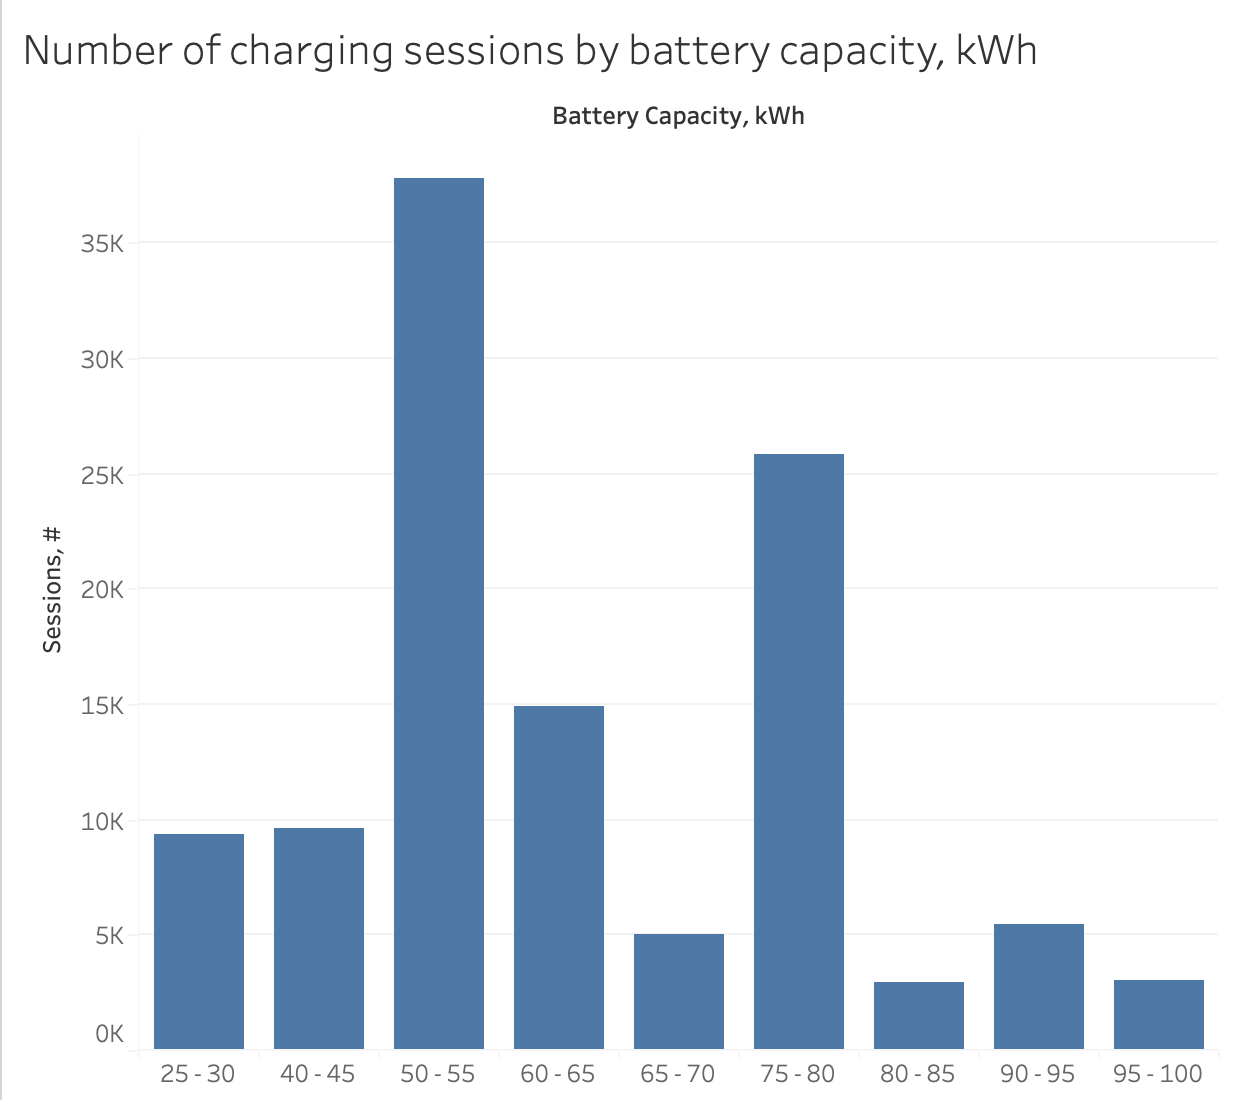

From this chart, we can see that around 33% of all charging sessions are made by users who possess the cars with a 50-55 kWh range. Another 22.5% of sessions are initiated by drivers with 75-80 kWh range.

### Chart 2 - Average kWh charged per different battery capacities

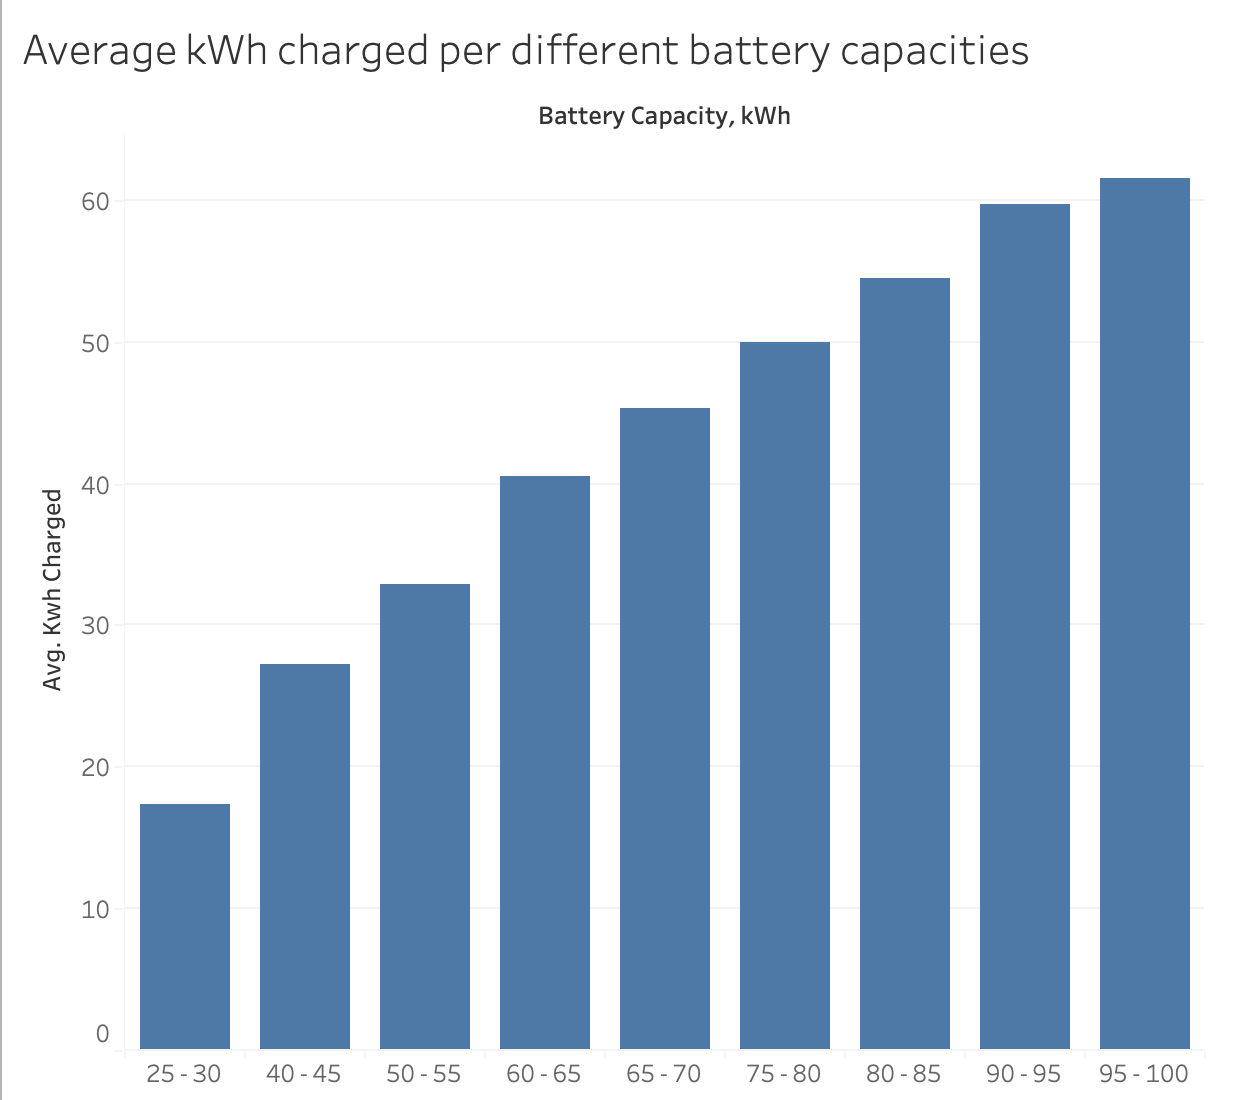

Here we can see the clear pattern - the larger the battery capacity is, the more kWh the user gets on average. Users from the most active cohort (the ones with 50-55 kWh batteries) on average get 32 kWh per session - around 60% of their battery capacity. That aligns with our previous calculations and shows the requirement for at least 50 kWh chargers near the points of interest (shopping malls, cafes, gyms), as well as slower chargers at residential buildings and offices; where cars usually stay parked longer and can charge up to 100% of battery.

Unfortunately, the data about charger locations is not sufficient yet for deeper analysis (e.g. where the current chargers are located and if they are AC or DC.)

## Analytical question 8 - How does the pricing policy of different operators differ from district to district? If it is different, how does it impact utilization?



In [18]:
operators_pricing = dataset['charging_sessions'].merge(dataset['charging_stations'][['station_id','district_name','operator_name']],on='station_id',how='left')
operators_pricing_tab = pd.pivot_table(operators_pricing,values='cost_per_kwh',index='district_name',columns='operator_name',aggfunc='mean')
display(operators_pricing_tab)


operator_name,Ekoenergetyka,GreenWay,Orlen Charge,Tauron,Tesla
district_name,,,,,
Bemowo,2.536797,NaN,NaN,NaN,2.567095
Mokotów,2.572461,NaN,2.563424,2.571775,2.577978
Ochota,2.550171,2.564532,2.570621,NaN,2.556213
Rembertów,2.557154,NaN,NaN,NaN,NaN
Targówek,NaN,2.575521,2.565374,2.549867,2.573924
Ursus,NaN,NaN,2.558784,NaN,NaN
Ursynów,2.570789,2.549777,2.555414,2.577056,2.552835
Wesoła,2.565532,2.561972,NaN,2.555115,2.554581
Wilanów,2.577121,2.556966,2.557274,2.553639,2.559235


We can see that operators keep a consistent pricing policy across all districts. Now, let's see how the users from different income groups are distributed across different districts.

##Analytical question 9 - Does utilization depend on the higher presence of user base of certain income group in a district?

In [19]:
income_groups = dataset['charging_sessions'].merge(dataset['charging_stations'][['station_id','district_name']],on='station_id',how='left')
income_groups = income_groups.merge(dataset['customers'][['customer_id','income_tier']],on='customer_id',how='left')

income_groups_tb = pd.pivot_table(income_groups,values='customer_id',index='district_name',columns='income_tier',aggfunc='count')

income_groups_tb['total'] = income_groups_tb.sum(axis=1,numeric_only=True)
income_groups_tb = income_groups_tb.sort_values(by='total',ascending=False)

cols_subset = [c for c in income_groups_tb.columns if c!='total']

income_groups_shares = income_groups_tb[cols_subset].div(income_groups_tb['total'],axis=0).fillna(0)
income_groups_shares = (income_groups_shares[cols_subset]*100).round(2)
income_groups_shares['total_users'] = income_groups_tb['total']
income_groups_shares.sort_values(by='total_users',ascending=False)

display(income_groups_shares)


income_tier,High,Low-Mid,Mid-Range,total_users
district_name,,,,
Ursynów,14.91,49.83,35.25,20956
Wesoła,14.61,49.74,35.65,19606
Wilanów,14.88,50.05,35.07,13956
Włochy,15.03,49.96,35.01,10447
Targówek,14.99,50.06,34.95,8746
Ochota,14.75,49.91,35.34,8696
Mokotów,15.11,49.72,35.17,8655
Śródmieście,14.62,49.61,35.77,5259
Żoliborz,16.30,49.62,34.08,3595


We can see that in each district, half of the users are from Low-Mid class, and only the minority are from the High income class. This information can help formulate correct pricing policies.